In [24]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

from astropy.table import Table

from S4Mock_io import read_clustering_dat,read_clustering_ran,read_mainsurvey_targets_bright,read_desitargetrandoms, read_mxxl
from corr_func_tools import calc_wtheta,create_axes

import numpy as np
import matplotlib.pyplot as plt

nbins = 30

from astropy.io import fits as fits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

In [38]:
"""
dat = read_clustering_dat()
ran = read_clustering_ran()
"""

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_full.dat.fits')
dat = x[1].data
dat = dat[(dat['FIBERASSIGN_X']<1e20)]

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_0_full.ran.fits')
ran = x[1].data 

In [3]:
targ = read_mainsurvey_targets_bright()

Runtime of 0.173489 seconds after 0 pixels
Runtime of 4.632463 seconds after 20 pixels
Runtime of 8.025636 seconds after 40 pixels
Runtime of 11.800184 seconds after 60 pixels
Runtime of 14.788249 seconds after 80 pixels
Runtime of 18.731677 seconds after 100 pixels
Runtime of 24.683635 seconds after 120 pixels
Runtime of 26.804554 seconds after 140 pixels
Runtime of 29.158518 seconds after 160 pixels
Runtime of 32.058525 seconds after 180 pixels
Runtime of 34.944997 seconds after 200 pixels
Runtime of 37.282870 seconds after 220 pixels
Runtime of 38.670480 seconds after 240 pixels
Runtime of 41.102026 seconds after 260 pixels
Runtime of 43.450776 seconds after 280 pixels
Runtime of 47.894192 seconds after 300 pixels
Runtime of 51.299465 seconds after 320 pixels
Runtime of 54.304193 seconds after 340 pixels
Runtime of 56.551620 seconds after 360 pixels
Runtime of 58.227447 seconds after 380 pixels
Runtime of 60.691595 seconds after 400 pixels
Runtime of 64.178139 seconds after 420 pixe

In [170]:
#mxxl = read_mxxl()

In [178]:
"""
ras = np.random.uniform(np.amin(mxxl['RA']),np.amax(mxxl['RA']),100000)
decs = np.random.uniform(np.amin(mxxl['DEC']),np.amax(mxxl['DEC']),100000)

mxxl_randoms   = Table(np.c_[ras, decs], names=['RA', 'DEC'])
"""

In [4]:
#just to make calc_wtheta run quicker

targ = targ[(targ['PHOTSYS']=='S')]
targ_small = targ[((targ['RA']>180) & (targ['RA']<190) & (targ['DEC']>0) & (targ['DEC']<10))]

In [5]:
targ_ran = read_desitargetrandoms()

In [6]:
targ_ran_small = targ_ran[((targ_ran['RA']>180) & (targ_ran['RA']<190) & (targ_ran['DEC']>0) & (targ_ran['DEC']<10))]

In [39]:
wtheta = calc_wtheta(dat['RA'],dat['DEC'],ran['RA'],ran['DEC'],nbins=nbins)

/global/homes/l/lbigwood/.local/lib/python3.8/site-packages/Corrfunc/utils.py:918: UserWarning: One or more input array has non-native endianness!  A copy will be made with the correct endianness.
  warnings.warn("One or more input array has non-native endianness!  A copy will"\


In [12]:
#weighted_wtheta = calc_wtheta(dat,ran,weight=True,nbins=nbins)

TypeError: calc_wtheta() got an unexpected keyword argument 'weight'

In [13]:
targ_wtheta =  calc_wtheta(targ_small['RA'],targ_small['DEC'],targ_ran_small['RA'],targ_ran_small['DEC'],nbins=nbins)

In [179]:
#mxxl_wtheta =  calc_wtheta(mxxl,mxxl_randoms,nbins=nbins)

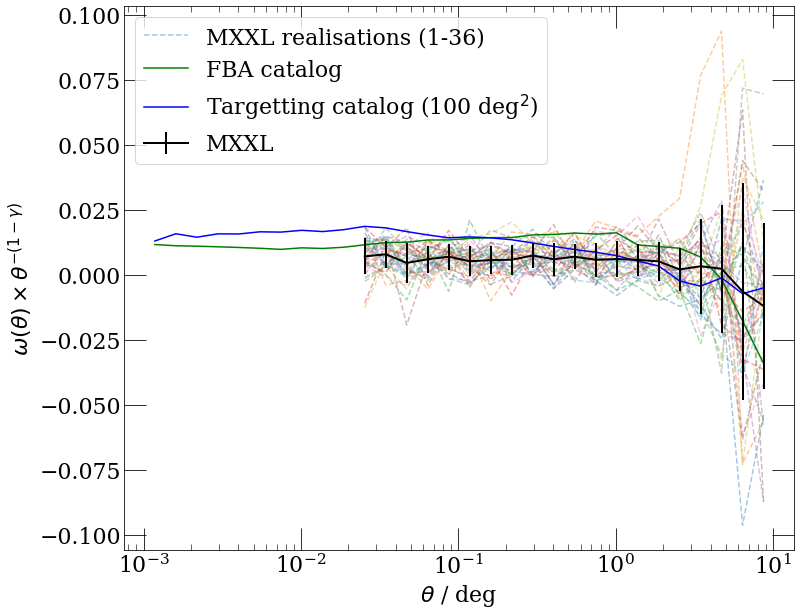

In [40]:
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

plt.figure(figsize=(12,10))

x_axis,y_axis = create_axes(wtheta,nbins)
#x_axis_w,y_axis_w = create_axes(weighted_wtheta,nbins)
x_axis_t,y_axis_t = create_axes(targ_wtheta,nbins)
#x_axis_r,y_axis_r = create_axes(mxxl_wtheta,nbins)

x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')
    

plt.plot(x_axis, y_axis,color='green',label='FBA catalog')
#plt.plot(x_axis, y_axis_w,color='pink',label='Clustering catalog weighted')
plt.plot(x_axis, y_axis_t,color='blue',label=r'Targetting catalog (100 deg$^2$)')
#plt.plot(x_axis, y_axis_r,color='purple',label=r'MXXL small catalog')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)

plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xscale('log')
#plt.yscale('log')
plt.legend()

#plt.savefig('clustering_corrfunc.png',bbox_inches='tight')

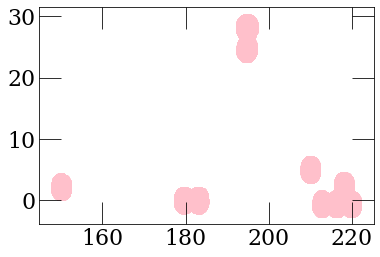

In [151]:
plt.scatter(ran['RA'],ran['DEC'],color='pink')

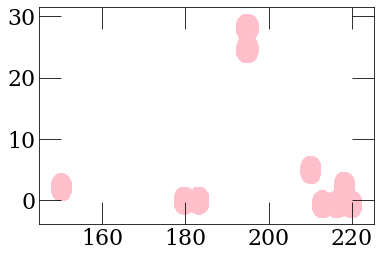

In [152]:
plt.scatter(dat['RA'],dat['DEC'],color='pink')

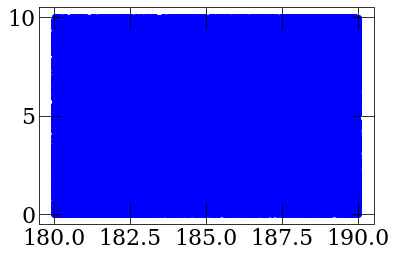

In [153]:
plt.scatter(targ_small['RA'],targ_small['DEC'],color='blue')

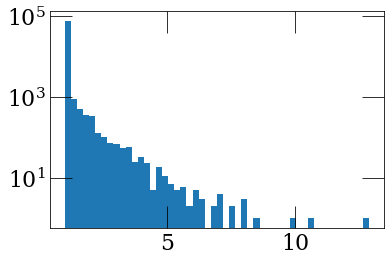

In [115]:
plt.hist(dat['WEIGHT'],bins=50)
plt.yscale('log')

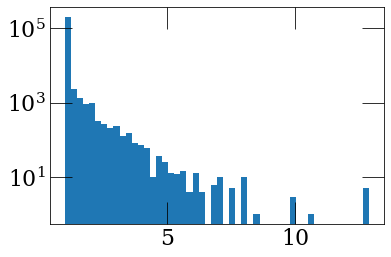

In [116]:
plt.hist(ran['WEIGHT'],bins=50)
plt.yscale('log')

In [35]:
x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_full.dat.fits')
dat = x[1].data
dat = dat[(dat['FIBERASSIGN_X']<1e20)]

array([-409.81583, -409.38425, -409.32166, ...,  409.1435 ,  409.24722,
        409.37076], dtype=float32)

In [36]:
Table(dat)

RA,DEC,TARGETID,PRIORITY_INIT,ZWARN_MTL,TARGET_STATE,TIMESTAMP,LOCATION,TILEID,TILELOCID,CHI2,COEFF [10],Z,ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,FIBER,COADD_FIBERSTATUS,FIBERASSIGN_X,FIBERASSIGN_Y,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_ELG_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_ELG_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_ELG_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_ELG,TSNR2_LYA,TSNR2_BGS,TSNR2_QSO,TSNR2_LRG,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,PHOTSYS,NTILE,TILES,TILELOCIDS,LOCATION_ASSIGNED,TILELOCID_ASSIGNED,sort,COMP_TILE,rosette_number,rosette_r,FRACZ_TILELOCID,BITWEIGHTS [2],PROB_OBS
float64,float64,int64,int64,int64,str30,str25,int64,int64,int64,float64,float64,float64,float64,int64,int64,str6,str20,int64,float64,int32,int32,float32,float32,int16,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int16,int32,str8,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,str1,int64,str43,str143,bool,int64,float64,float64,float64,float64,float64,int64,float64
212.07182231138097,-2.1576366940231786,39627733927462346,102100,-1,BGS|UNOBS,2021-04-04T23:14:10,1463,532,5321463,8692.672918319702,121.68951238388622 .. -14.996086956969426,0.2083179377892946,3.8697103852301554e-05,0,7886,GALAXY,,10,301.08885838184506,523,0,175.50546,-366.08752,1,329.2138,1,-0.004,0.004,0.001,0.001,0.7514636,0.01392836,7.5257273,83.0431,0.3701115,0.16940887,5.844662,0.0076712146,476.70197,1.7214196,8.169732,18.730686,0.0,944.68054,4.1966147,9.374912,24.589277,7.5333986,1504.4255,6.288146,17.714054,1152921504606846976,131074,0,9010,318256,2121m022,1482,SER,0.059076868,5.435668,15.029476,29.7828,334.7293,124.587234,36.408154,0.8395581,0.88887244,0.9362313,0.02633234,0.023294939,0.024694819,0.003468057,0.0037167594,0.0059790844,0.9991588,0.99914944,0.9985421,2,2,3,1009.4085,424.73178,106.70684,657.23926,263.6727,60.5422,28.868391,23.604856,2.337881,0.5745999,0.99003816,0.9938703,0,0,0,2.3560472,6.5144067,12.909119,2.3666756,6.5423255,12.962651,0,0,0,S,1,532,5321463,True,1,1505.425537109375,0.5714285714285714,17.0,1.7193414733275092,0.3333333333333333,37439489807543353 .. 6991981798404131877,0.3203125
212.13195284744052,-2.1397232701515705,39627733927463584,102100,-1,BGS|UNOBS,2021-04-04T23:14:10,1442,532,5321442,8176.399510648102,660.3244540502434 .. 24.759004304342646,0.18489203611868077,8.205159057958459e-05,0,7898,GALAXY,,10,121.10065173427574,515,0,159.9167,-360.7208,1,329.2138,1,-0.003,0.003,0.0,0.0,0.7250493,0.0139940595,7.5496564,83.09906,0.37281716,0.17044136,5.798085,0.007669441,473.66626,1.7119303,8.106192,18.594088,0.0,933.01483,4.169088,9.271143,24.406166,7.557326,1489.7802,6.253835,17.547775,1152921504606846976,131074,0,9010,318256,2121m022,2720,DEV,0.059687406,14.839426,41.38945,79.33491,116.59784,49.463898,5.1840606,0.83804214,0.8877909,0.9355939

In [30]:
x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_0_full.ran.fits')
ran = x[1].data 

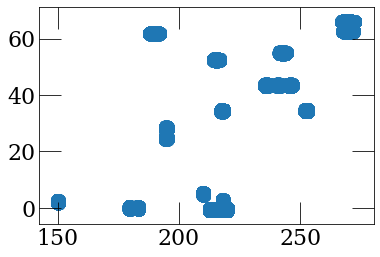

In [33]:
plt.scatter(dat['RA'],dat['DEC'])
#plt.scatter(ran['RA'],ran['DEC'])